# Forecasting with MCForecast

In this activity you will use the provided `MCForecastTools.py` module to forecast a portfolio's returns for one years worth of stock data from Home Depot and Disney.
  - You will retrieve data using the Quandl API.
  - You will then concatenate the dataframes for use with `MCSimulation`.
  - Then you will use `calc_cumulative_return` to get the cumulative return for the year.
  - After that you will plot the simulations, examine the distribution and review the summary statistics for the simulation.

>**Hint**: The most authoritative documentation you can find is the source code itself. You will need to read through the `MCForecastTools.py` file to get an idea of how the module is working.

## 1. Import Modules

In [1]:
# Import modules.
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
from MCForecastTools import MCSimulation


## 2. Load Environment Variables

In [2]:
# Load .env enviroment variables into the notebook
load_dotenv()

# Get the API key from the environment variable and store it as a python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")

True

## 3. Get Data from Quandl
  - Use the provided tickers and urls

In [3]:
# Ticker symbols
home_depot = "HD"
disney = "DIS"

In [4]:
# Urls for Quandl
url_hd = f"https://www.quandl.com/api/v3/datasets/WIKI/{home_depot}.json?&api_key={quandl_api_key}"

url_dis = f"https://www.quandl.com/api/v3/datasets/WIKI/{disney}.json?&api_key={quandl_api_key}"

In [5]:
# Home Depot response
response_hd = requests.get(url_hd).json()

In [6]:
# Disney response
response_dis = requests.get(url_dis).json()

## 4. Create a `pandas` `DataFrame`

- Using the response json objects, get a list of the column names and create dataframes for each ticker.
- Convert each dataframe's `Date` field to a `datetime` object and set `Date` as the index.
  - Use `to_datetime` to convert a string into a datetime object.
  - Use the `infer_datetime_format` parameter.
- Filter each dataframe to only keep the `"Open", "High", "Low", "Close", "Volume"` columns.
- The columns will then need to be renamed using all lowercase letters to work with `MCForecastTools`.
- Create a dictionary to hold the Home Depot and Disney dataframes similar to the following:
  ```
  { "ticker_name": ticker_df , .... }
  ```
  `MCForecastTools` requires that the dataframe be multi-indexed.
- Use the dictionary and `concat` from pandas to concentate the dataframes and return a multi-indexed dataframe.
- Use the dictionary's `.value()` method for the data parameter into `concat`.
- Set `axis = 1`.
- Use the dictionary's `.keys()` method for the `keys` parameter in `concat`.

In [7]:
# Get list of column names
column_names = response_hd["dataset"]["column_names"]

In [8]:
# Create a dataframe from Home Depot the response.
hd_df = pd.DataFrame(response_hd["dataset"]["data"], columns=column_names)

In [9]:
# Convert `Date` to datetime
hd_df["Date"] = pd.to_datetime(hd_df["Date"], infer_datetime_format=True)


In [10]:
# Set index
hd_df = hd_df.set_index("Date")

In [11]:
# Print Home Depot dataframe
hd_df

Open    High     Low   Close      Volume  Dividend  Split  \
Date                                                                      
2017-12-28  190.91  190.98  189.64  189.78   3175631.0      0.00    1.0   
2017-12-27  190.60  191.49  190.01  190.19   5912613.0      0.00    1.0   
2017-12-26  188.53  190.42  188.34  190.36   2969182.0      0.00    1.0   
2017-12-22  188.20  188.46  187.27  188.13   3256519.0      0.00    1.0   
2017-12-21  187.70  188.84  187.44  188.08   5859058.0      0.00    1.0   
...            ...     ...     ...     ...         ...       ...    ...   
2013-09-09   72.98   73.79   72.90   73.58   5781800.0      0.00    1.0   
2013-09-06   73.55   73.56   72.21   72.70   9968400.0      0.00    1.0   
2013-09-05   74.07   74.21   72.84   72.99  11039000.0      0.00    1.0   
2013-09-04   73.98   74.51   73.74   74.14   8271600.0      0.00    1.0   
2013-09-03   74.83   75.25   73.68   73.90   7802800.0      0.39    1.0   

              Adj_Open    Adj_High     Adj_Low   Adj_Close  Adj_Volume  
Date                                                                    
2017-12-28  177.544280  177.609379  176.363193  176.493392   3175631.0  
2017-12-27  177.255983  178.083673  176.707289  176.874687   5912613.0  
2017-12-26  175.330905  177.088585  175.154207  177.032785   2969182.0  
2017-12-22  175.024008  175.265805  174.159118  174.958909   3256519.0  
2017-12-21  174.559014  175.619201  174.317216  174.912409   5859058.0  
...                ...         ...         ...         ...         ...  
2013-09-09   62.005719   62.693916   61.937749   62.515495   5781800.0  
2013-09-06   62.490006   62.498502   61.351507   61.767824   9968400.0  
2013-09-05   62.931812   63.050759   61.886772   62.014215  11039000.0  
2013-09-04   62.855345   63.305647   62.651435   62.991286   8271600.0  
2013-09-03   63.577528   63.934371   62.600458   62.787375   7802800.0  

[1090 rows x 12 columns]

In [12]:
# Create a dataframe from the Disney response.
dis_df = pd.DataFrame(response_dis["dataset"]["data"], columns=column_names)

In [13]:
# Convert `Date` to datetime
dis_df["Date"] = pd.to_datetime(dis_df["Date"], infer_datetime_format=True)


In [14]:
# Set index
dis_df = dis_df.set_index("Date")

In [15]:
# Print Disney dataframe
dis_df

Open     High       Low   Close      Volume  Dividend  Split  \
Date                                                                         
2017-12-28  108.00  108.050  107.0600  107.77   3477599.0       0.0    1.0   
2017-12-27  108.42  108.550  107.4550  107.64   5624037.0       0.0    1.0   
2017-12-26  108.49  109.370  107.8900  108.12   3982398.0       0.0    1.0   
2017-12-22  109.40  109.685  108.4500  108.67   7377990.0       0.0    1.0   
2017-12-21  109.52  111.090  109.1892  109.57   9366706.0       0.0    1.0   
...            ...      ...       ...     ...         ...       ...    ...   
2013-09-09   61.60   61.835   61.2700   61.59   7224500.0       0.0    1.0   
2013-09-06   61.47   61.830   60.6300   61.39   7319400.0       0.0    1.0   
2013-09-05   61.07   61.600   60.9600   61.30   6356600.0       0.0    1.0   
2013-09-04   60.92   61.220   60.5200   61.11  14014600.0       0.0    1.0   
2013-09-03   61.42   61.990   60.6000   60.93   7016400.0       0.0    1.0   

              Adj_Open    Adj_High     Adj_Low   Adj_Close  Adj_Volume  
Date                                                                    
2017-12-28  105.021618  105.070239  104.107541  104.797960   3477599.0  
2017-12-27  105.430035  105.556450  104.491647  104.671545   5624037.0  
2017-12-26  105.498105  106.353836  104.914651  105.138308   3982398.0  
2017-12-22  106.383009  106.660149  105.459208  105.673141   7377990.0  
2017-12-21  106.499700  108.026403  106.178022  106.548321   9366706.0  
...                ...         ...         ...         ...         ...  
2013-09-09   56.014364   56.228056   55.714288   56.005271   7224500.0  
2013-09-06   55.896152   56.223509   55.132320   55.823406   7319400.0  
2013-09-05   55.532423   56.014364   55.432397   55.741567   6356600.0  
2013-09-04   55.396024   55.668821   55.032294   55.568796  14014600.0  
2013-09-03   55.850686   56.369001   55.105040   55.405117   7016400.0  

[1090 rows x 12 columns]

In [16]:
# Take only the "Open", "High", "Low", "Close", "Volume" columns for each dataframe.
hd_df = hd_df[["Open", "High", "Low", "Close", "Volume"]]
dis_df = dis_df[["Open", "High", "Low", "Close", "Volume"]]

In [17]:
# MCSimulation is case sensitive to column names.
# Rename the columns to "open", "high", "low", "close", "volume"
column_names = ["open", "high", "low", "close", "volume"]
hd_df.columns = column_names
dis_df.columns = column_names

In [18]:
# Create a dictionary of the two dataframes
to_merge_dict = {home_depot: hd_df, disney: dis_df}

In [19]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())


In [20]:
merged_df


HD                                         DIS           \
              open    high     low   close      volume    open     high   
Date                                                                      
2017-12-28  190.91  190.98  189.64  189.78   3175631.0  108.00  108.050   
2017-12-27  190.60  191.49  190.01  190.19   5912613.0  108.42  108.550   
2017-12-26  188.53  190.42  188.34  190.36   2969182.0  108.49  109.370   
2017-12-22  188.20  188.46  187.27  188.13   3256519.0  109.40  109.685   
2017-12-21  187.70  188.84  187.44  188.08   5859058.0  109.52  111.090   
...            ...     ...     ...     ...         ...     ...      ...   
2013-09-09   72.98   73.79   72.90   73.58   5781800.0   61.60   61.835   
2013-09-06   73.55   73.56   72.21   72.70   9968400.0   61.47   61.830   
2013-09-05   74.07   74.21   72.84   72.99  11039000.0   61.07   61.600   
2013-09-04   73.98   74.51   73.74   74.14   8271600.0   60.92   61.220   
2013-09-03   74.83   75.25   73.68   73.90   7802800.0   61.42   61.990   

                                          
                 low   close      volume  
Date                                      
2017-12-28  107.0600  107.77   3477599.0  
2017-12-27  107.4550  107.64   5624037.0  
2017-12-26  107.8900  108.12   3982398.0  
2017-12-22  108.4500  108.67   7377990.0  
2017-12-21  109.1892  109.57   9366706.0  
...              ...     ...         ...  
2013-09-09   61.2700   61.59   7224500.0  
2013-09-06   60.6300   61.39   7319400.0  
2013-09-05   60.9600   61.30   6356600.0  
2013-09-04   60.5200   61.11  14014600.0  
2013-09-03   60.6000   60.93   7016400.0  

[1090 rows x 10 columns]

## 5. Forecast with `MCSimulation`
- Create an instance of `MCSimulation` with the following parameter values:
  - `weights == [0.25,0.75]`
  - `num_simulations == 500`
  - `num_trading_days == 252`
- Call the `calc_cumulative_return` method to run the number of simulations.
- Call the `plot_simulation` method to plot the simulated returns.
- Call `plot_distribution` to plot a histogram of the underlying distribution.
- Call `summarize_cumulative_return` to display summary statistics for the simulated distribution.

In [21]:
# Create a simulation object
one_year_simulation = MCSimulation(
    portfolio_data=merged_df,
    weights=[0.25, 0.75],
    num_simulation=500,
    num_trading_days=252,
)


In [22]:
# Review the simulation input data
one_year_simulation.portfolio_data.head()

HD                                                     DIS  \
              open    high     low   close     volume daily_return    open   
Date                                                                         
2017-12-28  190.91  190.98  189.64  189.78  3175631.0          NaN  108.00   
2017-12-27  190.60  191.49  190.01  190.19  5912613.0     0.002160  108.42   
2017-12-26  188.53  190.42  188.34  190.36  2969182.0     0.000894  108.49   
2017-12-22  188.20  188.46  187.27  188.13  3256519.0    -0.011715  109.40   
2017-12-21  187.70  188.84  187.44  188.08  5859058.0    -0.000266  109.52   

                                                               
               high       low   close     volume daily_return  
Date                                                           
2017-12-28  108.050  107.0600  107.77  3477599.0          NaN  
2017-12-27  108.550  107.4550  107.64  5624037.0    -0.001206  
2017-12-26  109.370  107.8900  108.12  3982398.0     0.004459  
2017-12-22  109.685  108.4500  108.67  7377990.0     0.005087  
2017-12-21  111.090  109.1892  109.57  9366706.0     0.008282

In [23]:
# Run the Monte Carlo simulation to forecast the cumulative return
one_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.996383  0.996820  0.995666  1.022438  1.007784  1.004433  1.013614   
2    0.989774  0.988106  0.982914  1.036870  1.017775  1.021081  1.012809   
3    0.991635  0.986939  0.983380  1.030552  1.024339  1.020657  1.007921   
4    0.996651  0.994565  0.982195  1.022009  1.028320  1.020034  1.004659   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.017329  0.679119  0.992627  0.917784  0.855562  0.745859  0.892139   
249  1.027767  0.685158  0.992202  0.913779  0.855231  0.736262  0.894470   
250  1.027237  0.679900  0.987564  0.918701  0.852514  0.730252  0.889311   
251  1.024183  0.680255  0.987588  0.922014  0.839312  0.727164  0.891210   
252  1.024783  0.677633  1.003246  0.911798  0.846878  0.719790  0.883853   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.991741  1.007908  0.985651  ...  1.005530  1.001574  0.988061   
2    0.988115  0.999742  0.989477  ...  1.010812  1.008149  0.993731   
3    0.994563  1.002865  1.008190  ...  0.999118  1.005666  1.003867   
4    1.000557  0.990677  1.006381  ...  1.009747  1.006137  1.001605   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.834419  0.800477  0.601148  ...  0.881875  0.664388  0.984386   
249  0.832689  0.794536  0.592806  ...  0.877425  0.658600  0.990627   
250  0.839295  0.800240  0.596632  ...  0.879797  0.652293  0.983712   
251  0.858303  0.809409  0.602427  ...  0.884180  0.652453  0.982037   
252  0.867628  0.808430  0.594108  ...  0.885367  0.661332  0.973426   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.010089  0.992715  1.001979  0.992671  1.001802  0.986717  0.987776  
2    1.006935  0.993648  1.002588  1.003485  1.001253  1.001557  0.991773  
3    1.013889  0.985313  1.003040  1.005460  0.998392  1.017109  0.999922  
4    1.034965  0.979101  1.011225  1.001463  0.989213  0.994995  0.997358  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.990462  0.797501  0.972394  0.889875  0.856085  0.827123  0.887908  
249  0.995639  0.803425  0.975356  0.884016  0.858877  0.833079  0.901887  
250  1.000280  0.804592  0.978863  0.880440  0.844487  0.830853  0.899144  
251  1.001961  0.802756  0.974909  0.871050  0.857444  0.846644  0.892506  
252  1.000735  0.803971  0.991748  0.876185  0.858718  0.834245  0.899886  

[253 rows x 500 columns]

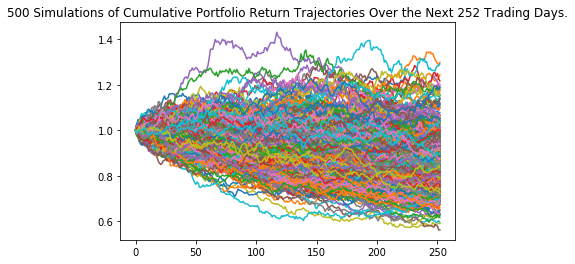

In [27]:
# Visualize the simulation by creating an
# overlay line plot
one_year_simulation.plot_simulation()

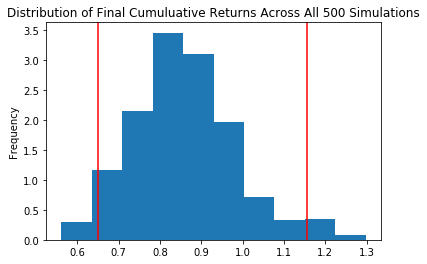

In [25]:
# Visualize the probability distribution of the simulation
# by plotting a histogram
one_year_simulation.plot_distribution()

In [26]:
# Generate summary statistics from the simulation results
# Save the results as a variable
one_year_simulation_statistics = one_year_simulation.summarize_cumulative_return()

# Review the summary statistics
print(one_year_simulation_statistics)


count           500.000000
mean              0.860857
std               0.124116
min               0.561754
25%               0.775296
50%               0.851888
75%               0.930354
max               1.298162
95% CI Lower      0.649677
95% CI Upper      1.155517
Name: 252, dtype: float64
